In [1]:
from __future__ import annotations

import pandas as pd
import numpy as np

# Make pandas output easier to read
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


In [2]:
import sys
sys.executable


'/usr/local/bin/python3'

In [3]:
import torch
import ab.nn.api as api

df = api.data()
df.head()


LEMUR root /Users/alicearslanian/nn-dataset


,id,task,dataset,metric,metric_code,metric_id,nn,nn_code,nn_id,epoch,accuracy,duration,prm_id,transform_code,transform_id,prm
0,8f403a8829d449c95ed63dc52198c8b9,img-captioning,coco,bleu,import torch\nfrom nltk.translate.bleu_score i...,ea58d1ac09f50538e1fe0625186c9a02,C10C-RESNETLSTM-6a517327bf0ef897a22186a2061e85b3,import torch\nimport torch.nn as nn\nimport to...,6a517327bf0ef897a22186a2061e85b3,1,0.080644,2.914302e+11,7562f99cc515f42428c048c6d46650c3,import torchvision.transforms as transforms\n\...,dbcf84be0259460695a2cc087542437a,"{'batch': 128, 'lr': 0.36776554035161274, 'mom..."
1,dd3dada0836456bb7c0df5e055e00d62,img-captioning,coco,bleu,import torch\nfrom nltk.translate.bleu_score i...,ea58d1ac09f50538e1fe0625186c9a02,C10C-RESNETLSTM-6a517327bf0ef897a22186a2061e85b3,import torch\nimport torch.nn as nn\nimport to...,6a517327bf0ef897a22186a2061e85b3,1,0.076481,3.335077e+11,7feea57f942cfa30cf18e78e37d25c25,import torchvision.transforms as transforms\n\...,bd142a1ecb2d76f76a3d2fbc22f6ab0e,"{'batch': 32, 'lr': 0.02522805487874858, 'mome..."
2,64c5a0ef283f82ddc2a56d84eb8fef97,img-captioning,coco,bleu,import torch\nfrom nltk.translate.bleu_score i...,ea58d1ac09f50538e1fe0625186c9a02,C10C-RESNETLSTM-6a517327bf0ef897a22186a2061e85b3,import torch\nimport torch.nn as nn\nimport to...,6a517327bf0ef897a22186a2061e85b3,1,0.076332,2.894959e+11,86754851ac98dc59d45ee7c20a534518,import torchvision.transforms as transforms\n\...,9f37cd71644369d284511c7589b6e39f,"{'batch': 64, 'lr': 0.011663684726243398, 'mom..."
3,e49d02589c88a71b17b88e8784072b17,img-captioning,coco,bleu,import torch\nfrom nltk.translate.bleu_score i...,ea58d1ac09f50538e1fe0625186c9a02,C10C-RESNETLSTM-6a517327bf0ef897a22186a2061e85b3,import torch\nimport torch.nn as nn\nimport to...,6a517327bf0ef897a22186a2061e85b3,1,0.074757,4.695554e+11,39799543e1d3123e06fee830b90054ae,import torchvision.transforms as transforms\n\...,31e0ee42b2dc903fa0c00d2ee68d8415,"{'batch': 64, 'lr': 0.013546136024635677, 'mom..."
4,7e2cacdeebf000721ec6425c197c6944,img-captioning,coco,bleu,import torch\nfrom nltk.translate.bleu_score i...,ea58d1ac09f50538e1fe0625186c9a02,C10C-RESNETLSTM-6a517327bf0ef897a22186a2061e85b3,import torch\nimport torch.nn as nn\nimport to...,6a517327bf0ef897a22186a2061e85b3,1,0.072939,2.878374e+11,5df991cd1841468b5919d57e5c13afff,import torchvision.transforms as transforms\n\...,010ad1d4e3d5789616b20d9a75507c49,"{'batch': 64, 'lr': 0.02652348314006258, 'mome..."


In [5]:
df.shape

(575889, 16)

In [6]:
df["task"].value_counts()


task
img-classification    446966
img-segmentation       64901
img-captioning         32578
txt-generation         12277
txt-image              10522
obj-detection           8645
Name: count, dtype: int64

In [7]:
df["dataset"].nunique(), df["nn"].nunique()


(9, 10329)

In [8]:
df = df.copy()
df["prm_str"] = df["prm"].astype(str)

run_cols = ["task", "dataset", "metric", "nn", "prm_str", "transform_code"]

idx = (
    df.groupby(run_cols)["accuracy"]
    .idxmax()
    .dropna()
    .astype(int)
)

best = df.loc[idx].copy()

best.rename(
    columns={
        "epoch": "best_epoch",
        "accuracy": "best_accuracy",
        "duration": "duration_at_best",
    },
    inplace=True,
)

best.shape


(83393, 17)

In [9]:
task_stats = (
    best.groupby("task")
    .agg(
        n_runs=("nn", "size"),
        n_unique_nns=("nn", "nunique"),
        mean_best_acc=("best_accuracy", "mean"),
        std_best_acc=("best_accuracy", "std"),
        median_best_acc=("best_accuracy", "median"),
        min_best_acc=("best_accuracy", "min"),
        max_best_acc=("best_accuracy", "max"),
        median_best_epoch=("best_epoch", "median"),
    )
    .sort_index()
)

task_stats


,n_runs,n_unique_nns,mean_best_acc,std_best_acc,median_best_acc,min_best_acc,max_best_acc,median_best_epoch
task,,,,,,,,
img-captioning,1162,13,0.060057,0.072310,0.020288,0.001723,0.325649,2.0
img-classification,79551,10292,0.486754,0.300402,0.459800,0.003288,0.997600,4.0
img-segmentation,1835,11,0.256157,0.127015,0.208636,0.133458,0.653248,34.0
obj-detection,435,4,0.253185,0.237384,0.170040,0.001353,0.977946,5.0
txt-generation,254,2,0.648754,0.181990,0.649636,0.024123,0.898882,50.0
txt-image,156,7,0.233003,0.016478,0.229440,0.176867,0.275127,31.0


In [10]:
tdm_stats = (
    best.groupby(["task", "dataset", "metric"])
    .agg(
        n_runs=("nn", "size"),
        n_unique_nns=("nn", "nunique"),
        mean_best_acc=("best_accuracy", "mean"),
        median_best_acc=("best_accuracy", "median"),
        max_best_acc=("best_accuracy", "max"),
        median_best_epoch=("best_epoch", "median"),
    )
    .sort_values("mean_best_acc", ascending=False)
)

tdm_stats.head(20)


n_runs  n_unique_nns  mean_best_acc  median_best_acc  max_best_acc  \
task               dataset       metric                                                                       
img-classification mnist         acc      11945          2132       0.847755         0.975400      0.997600   
txt-generation     wikitext      ppl        131             2       0.778534         0.819323      0.898882   
img-classification celeba-gender acc       7860          2106       0.761960         0.647781      0.984671   
txt-generation     wikitext      acc        123             2       0.510534         0.572366      0.687684   
img-classification cifar-10      acc      26263          8369       0.473221         0.498600      0.939000   
                   imagenette    acc       9442          1753       0.401224         0.413248      0.891210   
                   svhn          acc      12719          2803       0.351925         0.195874      0.965120   
img-segmentation   coco          iou       1835            11       0.256157         0.208636      0.653248   
obj-detection      coco          map        435             4       0.253185         0.170040      0.977946   
txt-image          coco          clip       156             7       0.233003         0.229440      0.275127   
img-classification cifar-100     acc       9735          1798       0.169404         0.142200      0.728600   
                   places365     acc       1587           337       0.166652         0.150603      0.465808   
img-captioning     coco          bleu      1162            13       0.060057         0.020288      0.325649   

                                         median_best_epoch  
task               dataset       metric                     
img-classification mnist         acc                   5.0  
txt-generation     wikitext      ppl                  50.0  
img-classification celeba-gender acc                   1.0  
txt-generation     wikitext      acc                  50.0  
img-classification cifar-10      acc                   4.0  
                   imagenette    acc                   5.0  
                   svhn          acc                   1.0  
img-segmentation   coco          iou                  34.0  
obj-detection      coco          map                   5.0  
txt-image          coco          clip                 31.0  
img-classification cifar-100     acc                   5.0  
                   places365     acc                   5.0  
img-captioning     coco          bleu                  2.0

In [11]:
best_models_per_task = (
    best.sort_values("best_accuracy", ascending=False)
        .groupby("task")
        .head(5)[
            ["task", "dataset", "metric", "nn", "best_accuracy", "best_epoch"]
        ]
)

best_models_per_task


,task,dataset,metric,nn,best_accuracy,best_epoch
342150,img-classification,mnist,acc,GoogLeNet,0.997600,26
342306,img-classification,mnist,acc,GoogLeNet,0.997400,39
342416,img-classification,mnist,acc,GoogLeNet,0.997100,48
343590,img-classification,mnist,acc,InceptionV3-2,0.996800,25
339734,img-classification,mnist,acc,DenseNet,0.996700,40
552790,obj-detection,coco,map,SSDLite,0.977946,46
550740,obj-detection,coco,map,SSDLite,0.953638,14
545261,obj-detection,coco,map,FCOS,0.945765,28
545768,obj-detection,coco,map,FCOS,0.913997,49
561463,txt-generation,wikitext,ppl,LSTM,0.898882,48


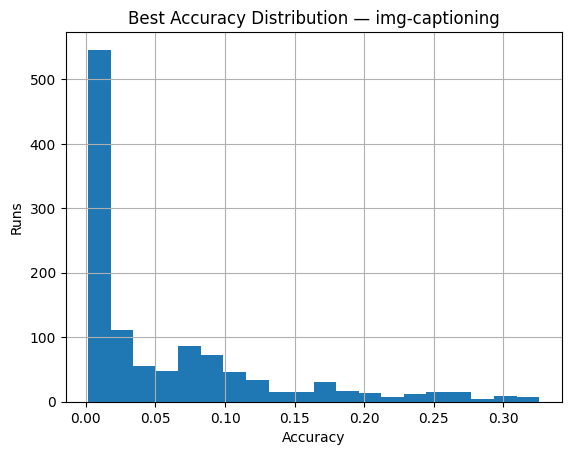

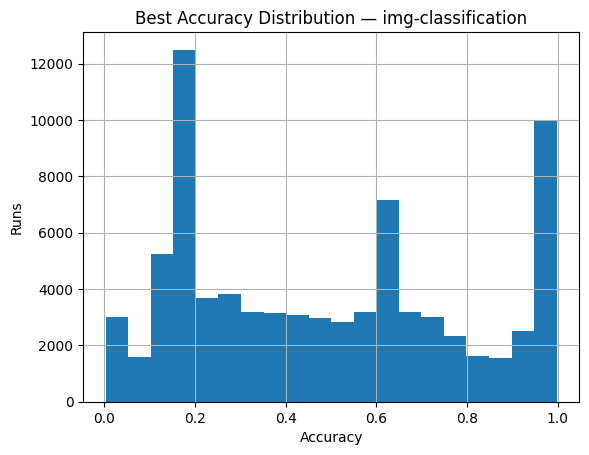

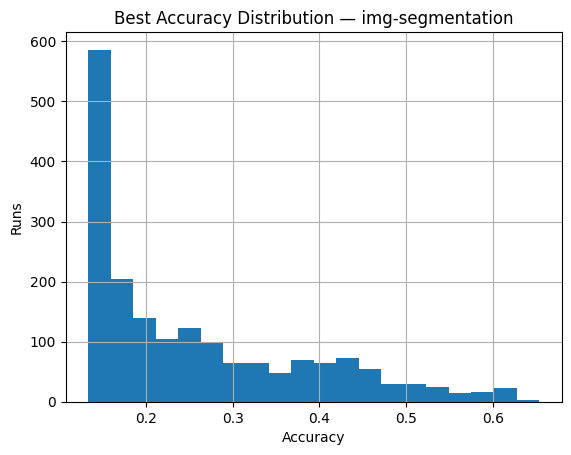

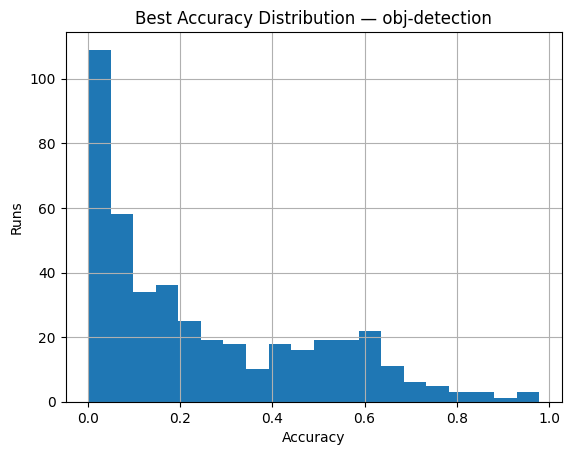

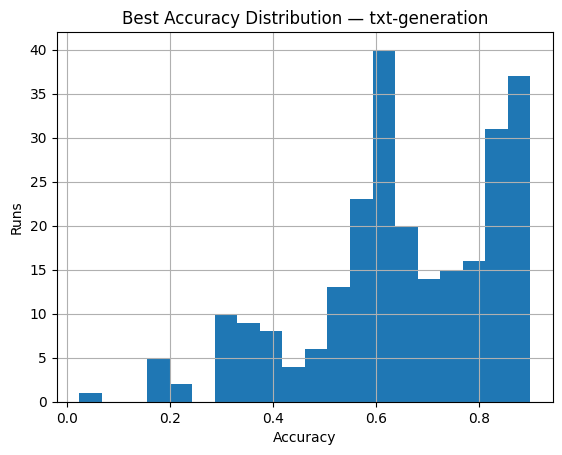

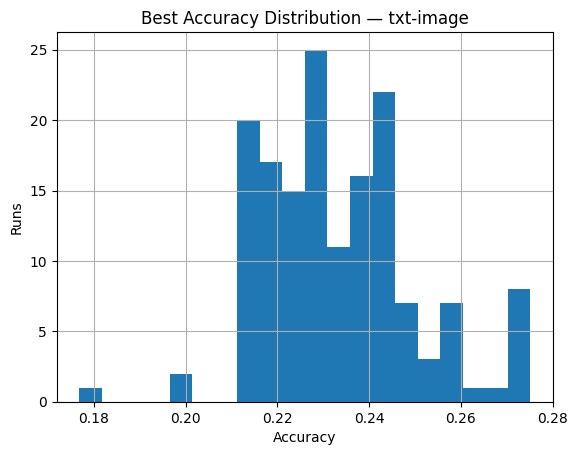

In [12]:
import matplotlib.pyplot as plt

for task, g in best.groupby("task"):
    plt.figure()
    g["best_accuracy"].hist(bins=20)
    plt.title(f"Best Accuracy Distribution — {task}")
    plt.xlabel("Accuracy")
    plt.ylabel("Runs")
    plt.show()
